In [1]:
#Importing Libraries

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Preprocessing the data

In [2]:
#Loading the dataset

df_train = pd.read_csv('../input/titanic/train.csv') 
df_test  = pd.read_csv('../input/titanic/test.csv')

In [3]:
#Viewing the dataset

display(df_train.head())
display()
display(df_test.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#Preprocessing needs to be done on both test and train data. So we will concatenate both test and train data.
#Creating a new column in test data
df_test['Survived'] = 999      #Assigning some random value to the test dataset

In [5]:
#Now both test and train can be concatenated

df = pd.concat([df_train , df_test] , axis = 0)
print(df_train.shape)
print(df_test.shape)
print('Combined dataframe shape :',df.shape)

(891, 12)
(418, 12)
Combined dataframe shape : (1309, 12)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


**Passenger Class**

Null Values : 0


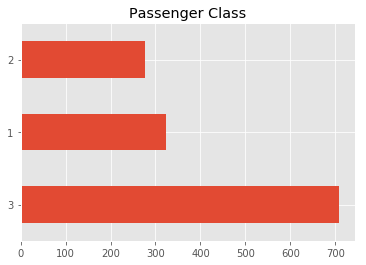

In [7]:
plt.style.use('ggplot')
print('Null Values :',df['Pclass'].isnull().sum())  #To find the number of null values
df['Pclass'].value_counts(sort = True).plot(kind = 'barh' ,title = 'Passenger Class')

There are no null values in the passenger class column .

We can see that most passengers travelled in 3rd Class , and 1st class comes second and least people travelled in second class.

So no preprocessing is required

**AGE**

In [8]:
#Null values
print('The number of null values in age columns',df['Age'].isnull().sum())
print('The % of null values in age columns',round(df['Age'].isnull().mean()* 100,2)) 

The number of null values in age columns 263
The % of null values in age columns 20.09


In [9]:
#Age column has lots of null values. 
#Around 20 % of the values are missing.

Range of age is between 0.17 and 80.0


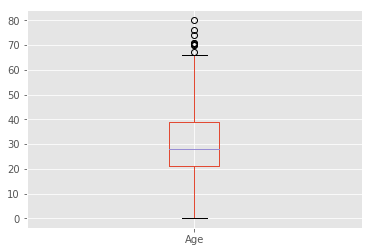

In [10]:
df['Age'].plot(kind='box')
print('Range of age is between',df['Age'].min() , 'and' ,df['Age'].max())

In [11]:
#Eventhough the box plot shows outlier we wont remove any outliers in age column , because maximum age of the person in titanic was 80

**CABIN : **

C = Cherbourg, Q = Queenstown, S = Southampton

In [12]:
#Null values
print('The number of null values in cabin columns',df['Cabin'].isnull().sum())
print('The % of null values in cabin columns',round(df['Cabin'].isnull().mean()* 100,2)) 

The number of null values in cabin columns 1014
The % of null values in cabin columns 77.46


Around 77 % of the values are missing .So its better to drop Cabin column than imputing the values

In [13]:
#Dropping Cabin column
df.drop(columns = 'Cabin' , inplace = True)

**EMBARKED :**

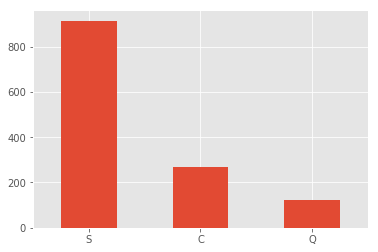

In [14]:
df['Embarked'].value_counts().plot(kind=  'bar' , rot = 0 )

In [15]:
print('The number of null values in Embarked is ', df['Embarked'].isnull().sum())

The number of null values in Embarked is  2


Since most people embarked in Southampton , the two values will be imputed with Southampton.

In [16]:
#NaN values are replaced with Southampton
df['Embarked'].replace({np.nan:'S'} , inplace = True)

**FARE : **

In [17]:
#Only one value of fare is missing.
df[df['Fare'].isnull()]

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,999,3701


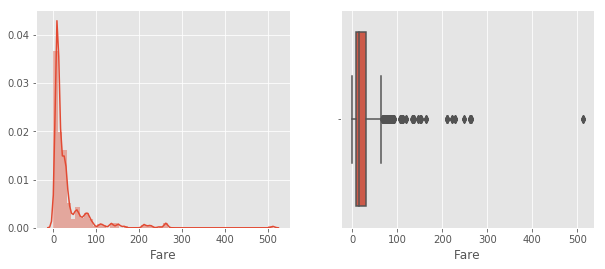

In [18]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.distplot(df['Fare'])
plt.subplot(1,2,2)
sns.boxplot(df['Fare'])

**NAME : **

In [19]:
df['Name'].isnull().sum()
#There are no missing values in name

0

In [20]:
df['Name'].head()
#Name is useless feature , but Title in the name can give some additional information for prediction

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [21]:
def GetTitle_temp(name):
    fname_title = name.split(',')[1]
    title = fname_title.split('.')[0]
    title = title.strip().lower()
    return title

df.Name.map(GetTitle_temp).value_counts()

mr              757
miss            260
mrs             197
master           61
dr                8
rev               8
col               4
mlle              2
ms                2
major             2
jonkheer          1
sir               1
the countess      1
don               1
mme               1
dona              1
capt              1
lady              1
Name: Name, dtype: int64

There are around 18 titles in the dataset. It can be combined to 4 titles Master,Mr,Miss and Mrs

In [22]:
def GetTitle(name):
    titles = {'mr' : 'Mr', 
               'mrs' : 'Mrs', 
               'miss' : 'Miss', 
               'master' : 'Master',
               'don' : 'Mr',
               'rev' : 'Mr',
               'dr' : 'Mr',
               'mme' : 'Mrs',
               'ms' : 'Mrs',
               'major' : 'Mr',
               'lady' : 'Miss',
               'sir' : 'Mr',
               'mlle' : 'Miss',
               'col' : 'Mr',
               'capt' : 'Mr',
               'the countess' : 'Miss',
               'jonkheer' : 'Mr',
               'dona' : 'Miss'
                 }
    fname_title = name.split(',')[1]
    title = fname_title.split('.')[0]
    title = title.strip().lower()
    return titles[title]

df['Name'] = df.Name.map(GetTitle)

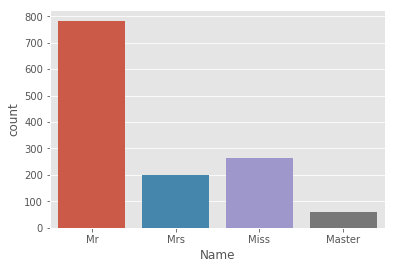

In [23]:
sns.countplot(df['Name'])

**PARCH :**

Number of parents / children aboard the Titanic

In [24]:
df['Parch'].value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

**SibSp :**
    
Number of siblings / spouses aboard the Titanic

In [25]:
df['SibSp'].value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [26]:
#Combining Sibsp and Parch columns to form number of people accompanying
df['Accomp'] = df['SibSp'] + df['Parch']
df.drop(columns = ['SibSp' , 'Parch'] , inplace = True)

**SEX : **

In [27]:
df['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

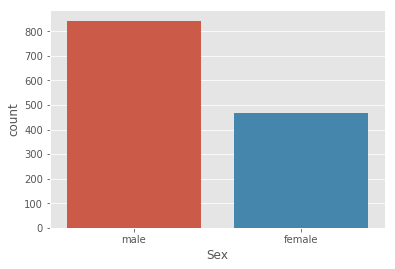

In [28]:
sns.countplot(df['Sex'])

In [29]:
#Encoding the Sex column
df['Sex'] = df['Sex'].map({'female':0 , 'male':1 })

**TICKET :**

In [30]:
#Dropping the ticket number
df.drop(columns = ['Ticket'] , inplace = True)

In [31]:
#Viewing the Data
df.head()

,Age,Embarked,Fare,Name,PassengerId,Pclass,Sex,Survived,Accomp
0,22.0,S,7.2500,Mr,1,3,1,0,1
1,38.0,C,71.2833,Mrs,2,1,0,1,1
2,26.0,S,7.9250,Miss,3,3,0,1,0
3,35.0,S,53.1000,Mrs,4,1,0,1,1
4,35.0,S,8.0500,Mr,5,3,1,0,0


**Encoding Categorical Variables :**

In [32]:
cat = pd.get_dummies(df[['Embarked' , 'Name']] , drop_first=True)

In [33]:
df = pd.concat([df,cat] , axis = 1)
df.drop(columns = ['Embarked' , 'Name'] , inplace = True)    #Dropping the original columns

In [34]:
#After Encoding
df.head()

,Age,Fare,PassengerId,Pclass,Sex,Survived,Accomp,Embarked_Q,Embarked_S,Name_Miss,Name_Mr,Name_Mrs
0,22.0,7.2500,1,3,1,0,1,0,1,0,1,0
1,38.0,71.2833,2,1,0,1,1,0,0,0,0,1
2,26.0,7.9250,3,3,0,1,0,0,1,1,0,0
3,35.0,53.1000,4,1,0,1,1,0,1,0,0,1
4,35.0,8.0500,5,3,1,0,0,0,1,0,1,0


### MISSING VALUE IMPUTATION :

In [35]:
#Checking the percentage of missing values:
df.isnull().mean()*100

Age            20.091673
Fare            0.076394
PassengerId     0.000000
Pclass          0.000000
Sex             0.000000
Survived        0.000000
Accomp          0.000000
Embarked_Q      0.000000
Embarked_S      0.000000
Name_Miss       0.000000
Name_Mr         0.000000
Name_Mrs        0.000000
dtype: float64

Importing missingno package to find the missing values and its patterns.

Missing values can be classified into three types :

1. Missing Completely at Random (MCAR)
2. Missing at Random (MAR)
3. Missing Not at Random (MNAR)

In our dataset we can find that Age column comes under the category of Missing completely at random


**MISSINGNO :**

Missingno package is imported. It helps to easily visualize missing values

Missing values can be visualized using 3 ways : 

1. Heatmap 
2. Finding Missing pattern using Matrix
3. Dendrogram

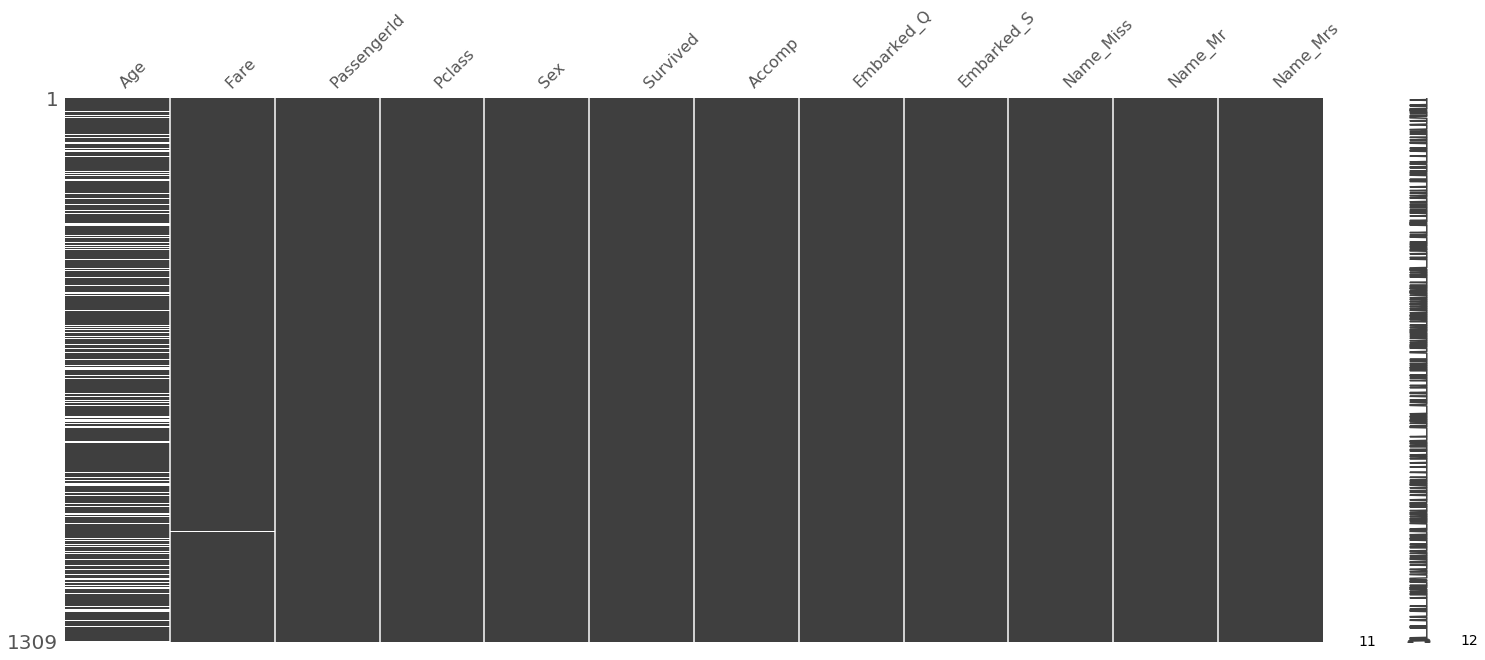

In [36]:
import missingno as msno
msno.matrix(df)

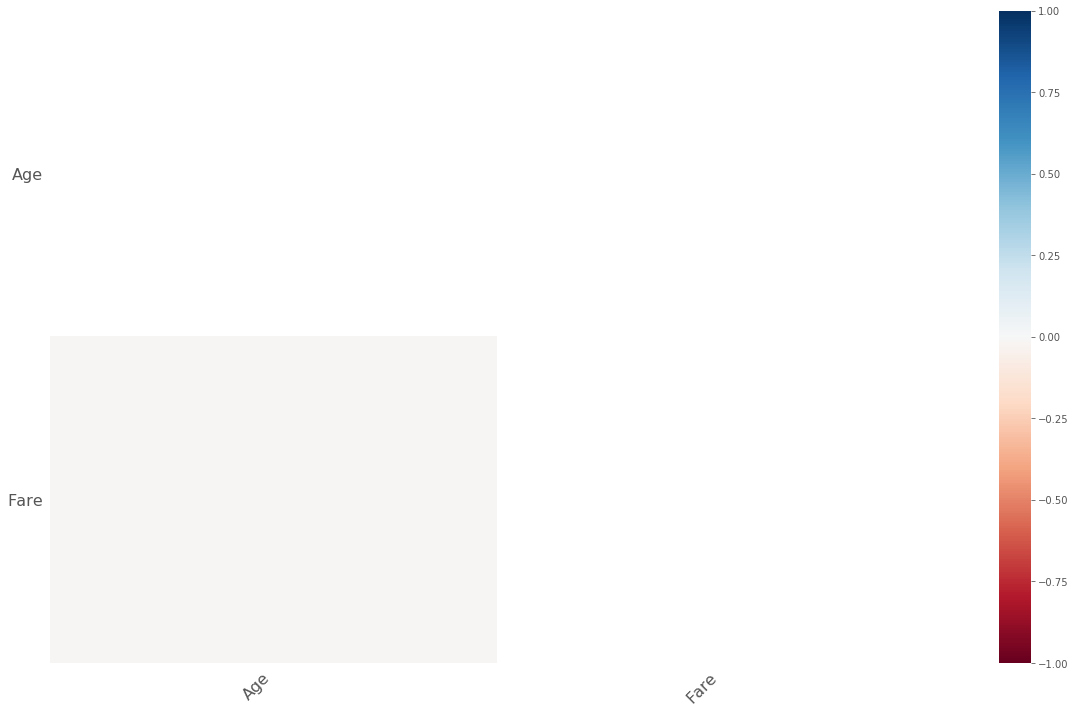

In [37]:
msno.heatmap(df)   #Heatmap to find any correlation of missing values between other missing columns
#From this heatpmap we can see that there is no correlation between missing values

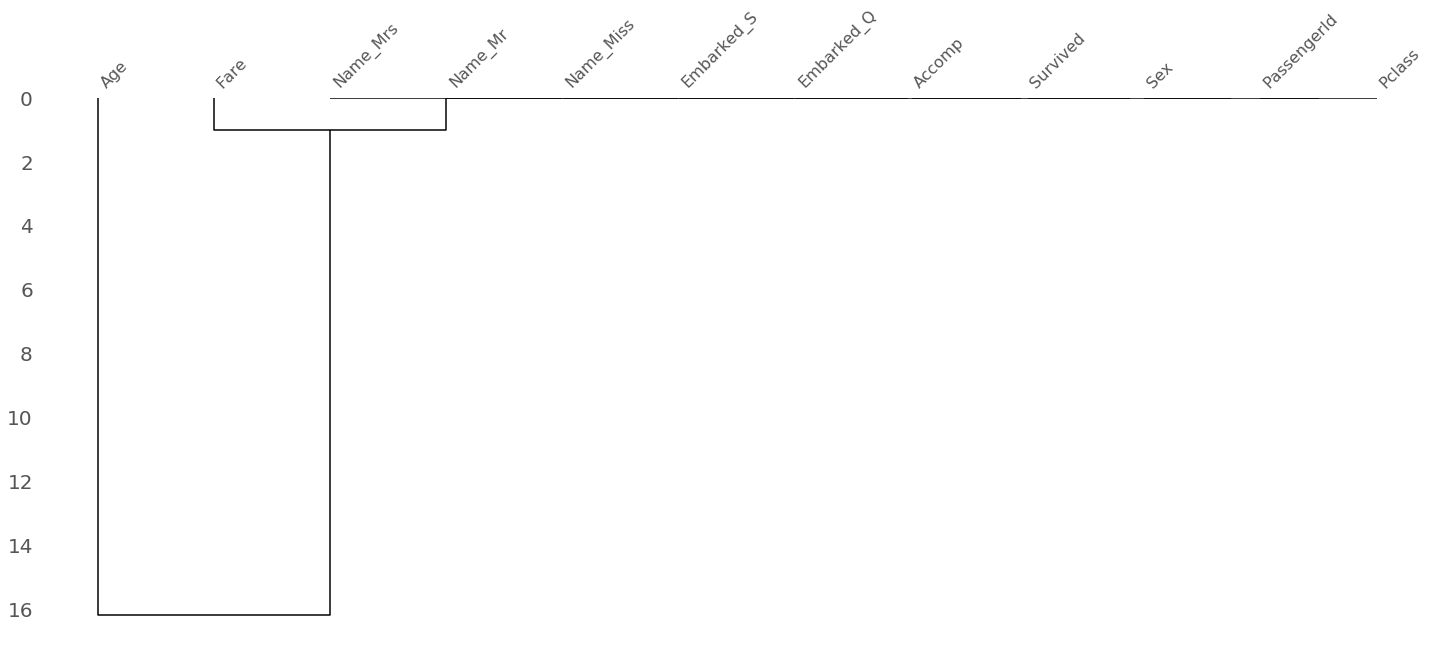

In [38]:
msno.dendrogram(df)

**FANCYIMPUTE:**

Fancyimpute imputation techniques,

1. KNN or K-Nearest Neighbor
2. MICE or Multiple Imputation by Chained Equation

KNN finds most similar points for imputing

MICE performs multiple regression for imputing

In [39]:
#Imputing using KNN : 

from fancyimpute import KNN
knn_imputer = KNN()
df_knn = df.copy()
df_knn.iloc[:,:] = knn_imputer.fit_transform(df_knn)

Using TensorFlow backend.


Imputing row 1/1309 with 0 missing, elapsed time: 0.276
Imputing row 101/1309 with 0 missing, elapsed time: 0.278
Imputing row 201/1309 with 0 missing, elapsed time: 0.280
Imputing row 301/1309 with 1 missing, elapsed time: 0.281
Imputing row 401/1309 with 0 missing, elapsed time: 0.283
Imputing row 501/1309 with 0 missing, elapsed time: 0.285
Imputing row 601/1309 with 0 missing, elapsed time: 0.286
Imputing row 701/1309 with 0 missing, elapsed time: 0.288
Imputing row 801/1309 with 0 missing, elapsed time: 0.290
Imputing row 901/1309 with 0 missing, elapsed time: 0.291
Imputing row 1001/1309 with 0 missing, elapsed time: 0.292
Imputing row 1101/1309 with 0 missing, elapsed time: 0.294
Imputing row 1201/1309 with 0 missing, elapsed time: 0.296
Imputing row 1301/1309 with 0 missing, elapsed time: 0.298


In [40]:
#Imputing using MICE

from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
df_mice = df.copy()
df_mice.iloc[:,:] = knn_imputer.fit_transform(df_mice)

Imputing row 1/1309 with 0 missing, elapsed time: 0.255
Imputing row 101/1309 with 0 missing, elapsed time: 0.258
Imputing row 201/1309 with 0 missing, elapsed time: 0.259
Imputing row 301/1309 with 1 missing, elapsed time: 0.261
Imputing row 401/1309 with 0 missing, elapsed time: 0.262
Imputing row 501/1309 with 0 missing, elapsed time: 0.264
Imputing row 601/1309 with 0 missing, elapsed time: 0.265
Imputing row 701/1309 with 0 missing, elapsed time: 0.267
Imputing row 801/1309 with 0 missing, elapsed time: 0.268
Imputing row 901/1309 with 0 missing, elapsed time: 0.269
Imputing row 1001/1309 with 0 missing, elapsed time: 0.271
Imputing row 1101/1309 with 0 missing, elapsed time: 0.273
Imputing row 1201/1309 with 0 missing, elapsed time: 0.274
Imputing row 1301/1309 with 0 missing, elapsed time: 0.275


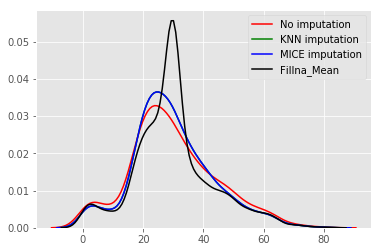

In [41]:
sns.kdeplot(df['Age'] , c = 'r' , label = 'No imputation')
sns.kdeplot(df_knn['Age'] , c = 'g' , label = 'KNN imputation')
sns.kdeplot(df_mice['Age'] , c = 'b' , label = 'MICE imputation')
sns.kdeplot(df['Age'].fillna(df['Age'].mean()) , c = 'k' , label = 'Fillna_Mean')
#Distribution of the columns are maintained while using this fancy imputation techniques
#The black kde plot shows how distribution when when we fill the null values with the mean value

In [42]:
df_mice.head()

,Age,Fare,PassengerId,Pclass,Sex,Survived,Accomp,Embarked_Q,Embarked_S,Name_Miss,Name_Mr,Name_Mrs
0,22.0,7.2500,1.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,38.0,71.2833,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,26.0,7.9250,3.0,3.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,35.0,53.1000,4.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,35.0,8.0500,5.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [43]:
df_mice.Survived.unique()

array([  0.,   1., 999.])

In [44]:
#Spiltting Test and Train Datas:
dfm_train = df_mice[df_mice['Survived'] != 999]
dfm_test  = df_mice[df_mice['Survived'] == 999]

print('Train Shape :',dfm_train.shape)
print('Test Shape :',dfm_test.shape)

dfm_test.drop(columns = 'Survived' , inplace = True)

Train Shape : (891, 12)
Test Shape : (418, 12)


In [45]:
dfm_train.head()

,Age,Fare,PassengerId,Pclass,Sex,Survived,Accomp,Embarked_Q,Embarked_S,Name_Miss,Name_Mr,Name_Mrs
0,22.0,7.2500,1.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,38.0,71.2833,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,26.0,7.9250,3.0,3.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,35.0,53.1000,4.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,35.0,8.0500,5.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### Applying XGBoost, (Without Hyperparameter Tuning)

In [46]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
X, y = dfm_train.drop(columns = ['Survived','PassengerId']) , dfm_train['Survived']
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2, random_state=123)
xg_cl = xgb.XGBClassifier(objective='binary:logistic',
n_estimators=20, seed=123)

xg_cl.fit(X_train, y_train)
preds = xg_cl.predict(X_test)
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.865922


In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test , preds)

array([[107,   7],
       [ 17,  48]])

In [48]:
y_pred =  xg_cl.predict(dfm_test.drop(columns='PassengerId')).astype('int')

results = pd.DataFrame(data={'PassengerId':dfm_test['PassengerId'].astype('int'), 'Survived':y_pred})
results.to_csv('Titanic Prediction_XGB.csv', index=False)

### **XGBoost with Hyperparameter Tuning using RandomizedSearchCV**

In [49]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
X, y = dfm_train.drop(columns = ['Survived','PassengerId']) , dfm_train['Survived']
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2, random_state=123)

# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 3,5,7 , 10],
        'gamma': [0.5, 1, 1.5, 2,3,4, 5],
        'subsample': [0.6,0.7, 0.8,0.9, 1.0],
        'colsample_bytree': [0.6,0.7, 0.8,0.9, 1.0],
        'max_depth': [3, 4, 5 , 6]
        }

xgb = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X,y), verbose=3, random_state=1001 )

random_search.fit(X, y)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    4.7s finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f47d4389938>,
                   error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           min_child_wei...
                                           validate_parameters=False,
                                           verbosity=None),
                   iid='deprecated', n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytree':

In [50]:
random_search.best_params_

{'subsample': 0.7,
 'min_child_weight': 5,
 'max_depth': 6,
 'gamma': 1.5,
 'colsample_bytree': 0.6}

**Predicting the values on Test Dataset**

In [51]:
y_test = random_search.predict(dfm_test.drop(columns='PassengerId')).astype('int')

results = pd.DataFrame(data={'PassengerId':dfm_test['PassengerId'].astype('int'), 'Survived':y_test})
results.to_csv('Titanic Prediction_XGB_hp.csv', index=False)

#Got final score of 0.79904

### Checking the accuracy on Fancyimpute (Knn) imputed dataframe :

In [52]:
#Spiltting Test and Train Datas:
dfm_train = df_knn[df_mice['Survived'] != 999]
dfm_test  = df_knn[df_mice['Survived'] == 999]

print('Train Shape :',dfm_train.shape)
print('Test Shape :',dfm_test.shape)

dfm_test.drop(columns = 'Survived' , inplace = True)

Train Shape : (891, 12)
Test Shape : (418, 12)


In [53]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
X, y = dfm_train.drop(columns = ['Survived','PassengerId']) , dfm_train['Survived']
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2, random_state=123)

# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 3,5,7 , 10],
        'gamma': [0.5, 1, 1.5, 2,3,4, 5],
        'subsample': [0.6,0.7, 0.8,0.9, 1.0],
        'colsample_bytree': [0.6,0.7, 0.8,0.9, 1.0],
        'max_depth': [3, 4, 5 , 6]
        }

xgb = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X,y), verbose=3, random_state=1001 )

random_search.fit(X, y)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    2.0s finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f47d4337db0>,
                   error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           min_child_wei...
                                           validate_parameters=False,
                                           verbosity=None),
                   iid='deprecated', n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytree':

In [54]:
y_test = random_search.predict(dfm_test.drop(columns='PassengerId')).astype('int')

results = pd.DataFrame(data={'PassengerId':dfm_test['PassengerId'].astype('int'), 'Survived':y_test})
results.to_csv('Titanic Predictionkn.csv', index=False)

#Got a score of 0.7666

Mice score was better compared to Knn

### STACKING

In [55]:
#Spiltting Test and Train Datas:
dfm_train = df_mice[df_mice['Survived'] != 999]
dfm_test  = df_mice[df_mice['Survived'] == 999]

print('Train Shape :',dfm_train.shape)
print('Test Shape :',dfm_test.shape)

dfm_test.drop(columns = 'Survived' , inplace = True)

Train Shape : (891, 12)
Test Shape : (418, 12)


In [56]:
#KNN randomized search

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from scipy.stats import randint as sp_randint

knn = KNeighborsClassifier()

params = {
    'n_neighbors' : sp_randint(1 , 20) ,
    'p' : sp_randint(1 , 5) ,
}

rsearch_knn = RandomizedSearchCV(knn , param_distributions = params , cv = 3 , random_state= 3  , n_jobs = -1 , return_train_score=True)

rsearch_knn.fit(X , y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f47d43aa2b0>,
                                        'p': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f47efeb3ef0>},
                   pre_dispatch='2*n_jobs', random_state=3, refit=True,
                   return_train_score=True, scoring=None, verbose=0)

In [57]:
rsearch_knn.best_params_

{'n_neighbors': 9, 'p': 1}

In [58]:
#Random Forest randomized search
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=3)
params = { 'n_estimators' : sp_randint(50 , 200) , 
           'max_features' : sp_randint(1 , 12) ,
           'max_depth' : sp_randint(2,10) , 
           'min_samples_split' : sp_randint(2,20) ,
           'min_samples_leaf' : sp_randint(1,20) ,
           'criterion' : ['gini' , 'entropy']
    
}

rsearch_rfc = RandomizedSearchCV(rfc , param_distributions= params , n_iter= 200 , cv = 3 , scoring='roc_auc' , random_state= 3 , return_train_score=True , n_jobs=-1)

rsearch_rfc.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [59]:
rsearch_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 14,
 'n_estimators': 94}

In [60]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear')
knn = KNeighborsClassifier(**rsearch_knn.best_params_)
rfc = RandomForestClassifier(**rsearch_rfc.best_params_)

clf = VotingClassifier(estimators=[('lr' ,lr) , ('knn' , knn) , ('rfc' , rfc)] , voting = 'soft')

clf.fit(X , y)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowsk...
                                            

In [61]:
y_test = clf.predict(dfm_test.drop(columns='PassengerId')).astype('int')

results = pd.DataFrame(data={'PassengerId':dfm_test['PassengerId'].astype('int'), 'Survived':y_test})
results.to_csv('Titanic Prediction_Stack.csv', index=False)


### **RANDOM FOREST :**

In [62]:
X, y = dfm_train.drop(columns = ['Survived','PassengerId']) , dfm_train['Survived']
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2, random_state=123)

In [63]:
RFM = RandomForestClassifier(criterion='gini',
                                           n_estimators=1750,
                                           max_depth=7,
                                           min_samples_split=6,
                                           min_samples_leaf=6,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=123,
                                           n_jobs=-1,
                                           verbose=1) 

RFM.fit(X,y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    4.6s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=1750,
                       n_jobs=-1, oob_score=True, random_state=123, verbose=1,
                       warm_start=False)

In [64]:
y_pred = RFM.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1750 out of 1750 | elapsed:    0.6s finished


In [65]:
y_test = RFM.predict(dfm_test.drop(columns='PassengerId')).astype('int')

results = pd.DataFrame(data={'PassengerId':dfm_test['PassengerId'].astype('int'), 'Survived':y_test})
results.to_csv('Titanic PredictionRFM.csv', index=False)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1750 out of 1750 | elapsed:    0.7s finished


**EXTRA TREE CLASSIFIER :**

In [66]:
X, y = dfm_train.drop(columns = ['Survived','PassengerId']) , dfm_train['Survived']
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2, random_state=123)

In [67]:
from sklearn.ensemble import ExtraTreesClassifier
import sklearn.model_selection as model_selection

clf_ET = ExtraTreesClassifier(random_state=0, bootstrap=True, oob_score=True)

sss = model_selection.StratifiedShuffleSplit(n_splits=10, test_size=0.33, random_state= 0)
sss.get_n_splits(X, y)

parameters = {'n_estimators' : np.r_[10:210:10],
              'max_depth': np.r_[1:6]
             }

grid = model_selection.GridSearchCV(clf_ET, param_grid=parameters, scoring = 'accuracy', cv = sss, return_train_score=True, n_jobs=4, verbose=2)
grid.fit(X,y)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=4)]: Done  92 tasks      | elapsed:    6.9s
[Parallel(n_jobs=4)]: Done 222 tasks      | elapsed:   26.1s
[Parallel(n_jobs=4)]: Done 425 tasks      | elapsed:   51.1s
[Parallel(n_jobs=4)]: Done 708 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:  2.1min finished


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.33,
            train_size=None),
             error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,...
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=True, random_state=0,
                                            verbose=0, warm_

In [68]:
y_test = RFM.predict(dfm_test.drop(columns='PassengerId')).astype('int')

results = pd.DataFrame(data={'PassengerId':dfm_test['PassengerId'].astype('int'), 'Survived':y_test})
results.to_csv('Titanic PredictionETC.csv', index=False)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1750 out of 1750 | elapsed:    0.7s finished
